# ExMAS with NYC data


We use NYC requests data stored at [kaggle](https://www.kaggle.com/yasserh/nyc-taxi-trip-duration/) 

* please donwload the 'NYC.csv' to run the experiments from [here](https://www.kaggle.com/yasserh/nyc-taxi-trip-duration/?select=NYC.csv)
* the 'OSM' graph is already downloaded (for the `Feb 2022`) before the first run you need to compute the distance matrix - later you may comment out this block (`inData = ExMAS.utils.download_G(inData, params, download = False)`)
* you parameterize 'ExMAS' for nyc with:
    * `params.date` (DDMMYYYY)
    * `params.t0' (HH:MS)
    * 'params.simTime' (int - number of hours - by default 10 minutes, i.e. 1/6)
* apart from default `ExMAS` parametertization as described [here](https://github.com/RafalKucharskiPK/ExMAS/blob/master/ExMAS/notebooks/01_Configuration.ipynb)
* you can simulate from 2016-01-01 to 2016-06-30









In [59]:
import os
import pandas as pd
import random
cwd = os.getcwd()
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
os.chdir(os.path.join(cwd,'../../..'))
import ExMAS.main
import ExMAS.utils

In [5]:
from ExMAS.utils import inData as inData

#### Config

uncomment below to create new `config.json` from the default, otherwise load the predefined `nyc.json`

In [139]:
params = ExMAS.utils.get_config('ExMAS/data/configs/default.json')
params.city = 'Manhattan, New York County, New York, United States'
params = ExMAS.utils.make_paths(params) #update file paths
params.t0 = '15:00'
params.nP =100
params.paths.nyc_trips = 'ExMAS/data/nyc/nyc.csv'
params.paths.nyc_requests = 'ExMAS/data/nyc/nyc_requests.csv'
params.demand_structure.destinations_dispertion = 0 # uniform spatial distributions
params.demand_structure.origins_dispertion = 0
params.date = "20160101"
params.freq = "10min"
params.speeds.ride = params.speed
params.simTime = 1/6
ExMAS.utils.save_config(params, 'ExMAS/data/configs/nyc.json')

In [55]:
params = ExMAS.utils.get_config('ExMAS/data/configs/nyc.json') # load the default 

#### Network: 
* download from OSMnx (not needed - already on the repo)
* load graphml 
* compute matrix (just once)
* load the matrix

In [10]:
#inData = ExMAS.utils.download_G(inData, params, compute_skims = False download = True) # to download the graph from osmnx 
#(shall be redundant, since it is storded at repo already)

In [49]:
inData = ExMAS.utils.download_G(inData, params, download = False) # to compute the matrix from the graph 
# run this just once, to compute the distances matrix from the graph (ca. 100mb)

In [50]:
inData = ExMAS.utils.load_G(inData, params, stats = True) # use this if you already have a graph and 

#### Test ExMAS on this network with synthetic data

In [51]:
inData = ExMAS.utils.generate_demand(inData, params)

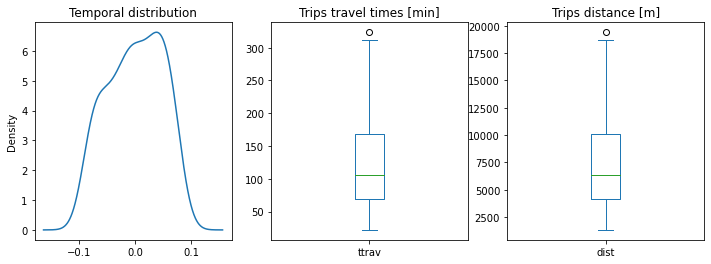

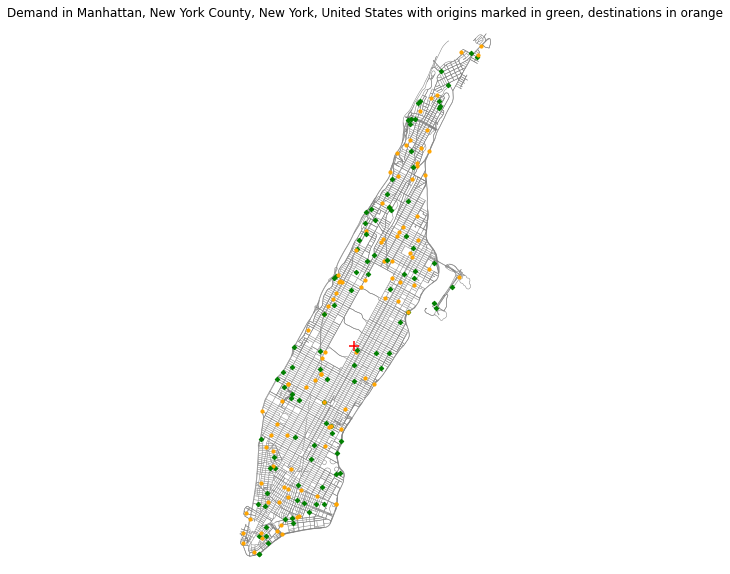

In [52]:
ExMAS.utils.plot_demand(inData, params)

25-02-22 11:38:54-INFO-Initializing pairwise trip shareability between 100 and 100 trips.
25-02-22 11:38:54-INFO-creating combinations
25-02-22 11:38:54-INFO-9900	 nR*(nR-1)
25-02-22 11:38:54-INFO-9847	departure compatibility
25-02-22 11:38:54-INFO-4558	origins shareability
25-02-22 11:38:54-INFO-1886	utility for i
25-02-22 11:38:54-INFO-645	utility for j
25-02-22 11:38:54-INFO-546	LIFO pairs
25-02-22 11:38:54-INFO-Reduction of feasible pairs by 94.48%


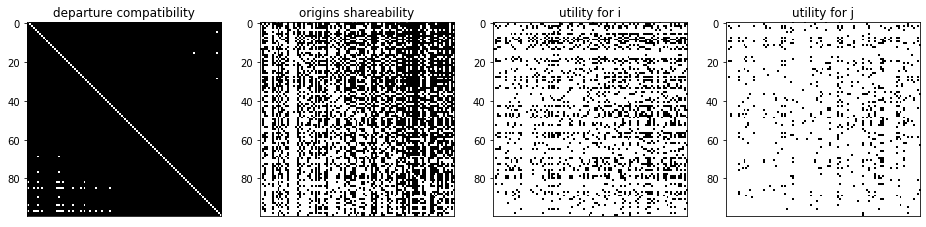

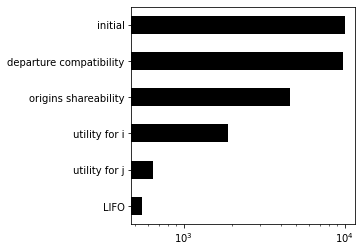

25-02-22 11:38:54-INFO-Degree 2 	Completed
25-02-22 11:38:55-INFO-trips to extend at degree 2 : 1191
25-02-22 11:38:57-INFO-At degree 2 feasible extensions found out of 5009 searched
25-02-22 11:38:57-INFO-Degree 3 	Completed
25-02-22 11:38:57-INFO-trips to extend at degree 3 : 5009
25-02-22 11:39:11-INFO-At degree 3 feasible extensions found out of 6753 searched
25-02-22 11:39:11-INFO-Degree 4 	Completed
25-02-22 11:39:11-INFO-trips to extend at degree 4 : 6753
25-02-22 11:39:29-INFO-At degree 4 feasible extensions found out of 2455 searched
25-02-22 11:39:29-INFO-Degree 5 	Completed
25-02-22 11:39:29-INFO-trips to extend at degree 5 : 2455
25-02-22 11:39:35-INFO-At degree 5 feasible extensions found out of 383 searched
25-02-22 11:39:35-INFO-Degree 6 	Completed
25-02-22 11:39:35-INFO-trips to extend at degree 6 : 383
25-02-22 11:39:36-INFO-At degree 6 feasible extensions found out of 29 searched
25-02-22 11:39:36-INFO-Degree 7 	Completed
25-02-22 11:39:36-INFO-trips to extend at degr

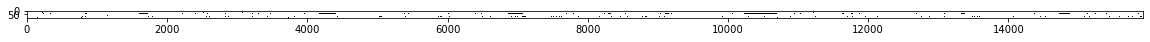

25-02-22 11:39:47-INFO-Problem solution: Optimal. 
Total costs for single trips:         91,261 
reduced by matching to:               46,368
25-02-22 11:39:47-INFO-Calculations  completed
25-02-22 11:39:47-INFO-DotMap(VehHourTrav=46203, VehHourTrav_ns=91261, PassHourTrav=107091, PassHourTrav_ns=91261, PassUtility=1332.8369499999997, PassUtility_ns=1415.0974999999999, mean_lambda=0.5165755710258328, revenue_s=95824.04999999999, revenue_ns=136891.5, Fare_Discount=-0.3000000000000001, nR=100, SINGLE=13, PAIRS=11, TRIPLES=9, QUADRIPLES=1, QUINTETS=3, PLUS5=3, shared_ratio=0.87, fleet_size_nonshared=88.0, fleet_size_shared=35.0, lambda_shared=0.5165755710258328)


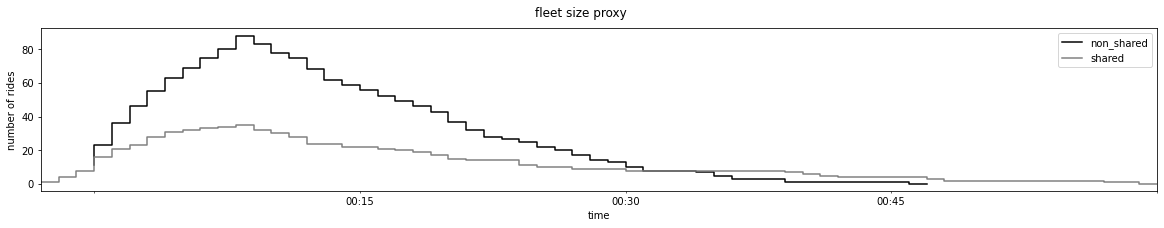

In [53]:
inData = ExMAS.main(inData, params, plot = True)

In [129]:
from ExMAS.utils import load_nyc_csv

#### Load trip data from NYC

In [136]:
inData = load_nyc_csv(inData, params)

25-02-22 12:29:49-INFO-Initializing pairwise trip shareability between 22 and 22 trips.
25-02-22 12:29:49-INFO-creating combinations
25-02-22 12:29:49-INFO-462	 nR*(nR-1)
25-02-22 12:29:49-INFO-368	departure compatibility
25-02-22 12:29:49-INFO-128	origins shareability
25-02-22 12:29:49-INFO-28	utility for i
25-02-22 12:29:49-INFO-7	utility for j
25-02-22 12:29:49-INFO-9	LIFO pairs
25-02-22 12:29:49-INFO-Reduction of feasible pairs by 98.05%


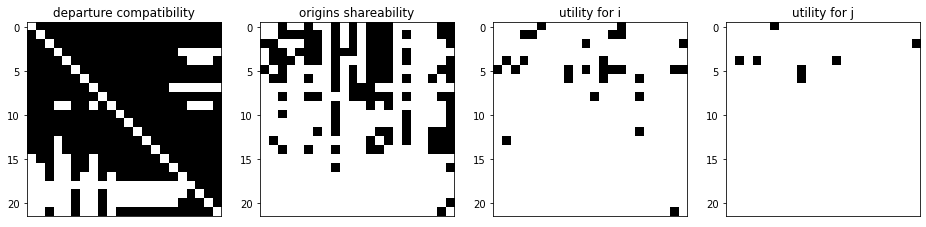

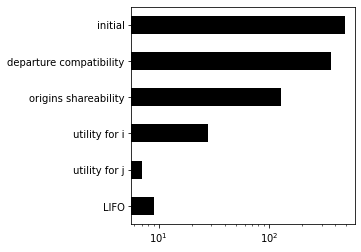

25-02-22 12:29:50-INFO-Degree 2 	Completed
25-02-22 12:29:50-INFO-trips to extend at degree 2 : 16
25-02-22 12:29:50-INFO-At degree 2 feasible extensions found out of 0 searched
25-02-22 12:29:50-INFO-Degree 3 	Completed
25-02-22 12:29:50-INFO-No more trips to exted at degree 3
25-02-22 12:29:50-INFO-Matching 22 trips to 38 rides in order to minimize u_veh


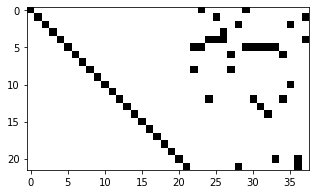

25-02-22 12:29:50-INFO-Problem solution: Optimal. 
Total costs for single trips:          6,620 
reduced by matching to:                5,753
25-02-22 12:29:50-INFO-Calculations  completed
25-02-22 12:29:50-INFO-DotMap(VehHourTrav=5693, VehHourTrav_ns=6620, PassHourTrav=6827, PassHourTrav_ns=6620, PassUtility=97.80945, PassUtility_ns=102.7165, mean_lambda=0.25597874224977857, revenue_s=6951.0, revenue_ns=9930.0, Fare_Discount=-0.3, nR=22, SINGLE=14, PAIRS=4, TRIPLES=0, QUADRIPLES=0, QUINTETS=0, PLUS5=0, shared_ratio=0.36363636363636365, fleet_size_nonshared=12.0, fleet_size_shared=11.0, lambda_shared=0.25597874224977857)


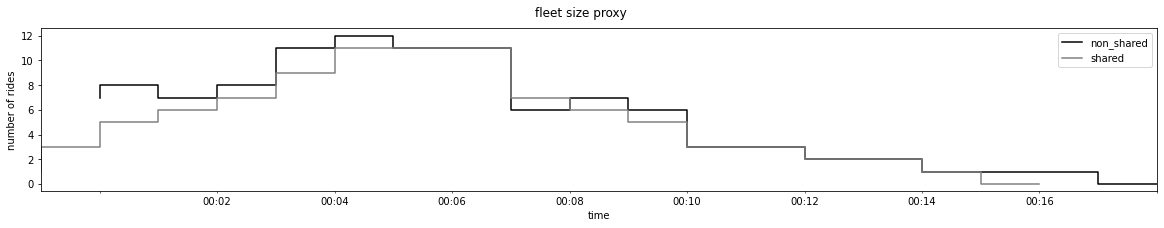

In [138]:
inData = ExMAS.main(inData, params, plot = True)

# Pipeline - multiple batches

In [140]:
for batch in [300,400,900,1324]:
    params.batch = batch
    inData = load_nyc_csv(inData, params)
    inData = ExMAS.main(inData, params, plot = False)
    

25-02-22 12:30:16-INFO-Initializing pairwise trip shareability between 48 and 48 trips.
25-02-22 12:30:16-INFO-creating combinations
25-02-22 12:30:16-INFO-2256	 nR*(nR-1)
25-02-22 12:30:16-INFO-Reduction of feasible pairs by 96.14%
25-02-22 12:30:16-INFO-Degree 2 	Completed
25-02-22 12:30:16-INFO-trips to extend at degree 2 : 181
25-02-22 12:30:16-INFO-At degree 2 feasible extensions found out of 253 searched
25-02-22 12:30:16-INFO-Degree 3 	Completed
25-02-22 12:30:16-INFO-trips to extend at degree 3 : 253
25-02-22 12:30:16-INFO-At degree 3 feasible extensions found out of 280 searched
25-02-22 12:30:17-INFO-Degree 4 	Completed
25-02-22 12:30:17-INFO-trips to extend at degree 4 : 280
25-02-22 12:30:17-INFO-At degree 4 feasible extensions found out of 115 searched
25-02-22 12:30:17-INFO-Degree 5 	Completed
25-02-22 12:30:17-INFO-trips to extend at degree 5 : 115
25-02-22 12:30:17-INFO-At degree 5 feasible extensions found out of 9 searched
25-02-22 12:30:17-INFO-Degree 6 	Completed
25

-------------
Rafal Kucharski, 2022, Delft, r.m.kucharski@tudelft.nl